In [29]:
import numpy as np
from numpy.random import exponential, randint
from numpy import *   #ones, cumsum, sum, isscalar
from matplotlib.pylab import * 
%matplotlib inline
plotose = True
import pickle


In [30]:
with open("data_Fullset/Fullset.pkl","rb") as f:
    data = pickle.load(f)

In [31]:
for key in data.keys():
    print(key,":",data[key].shape)

#Bch : (374,)
Dsb : (374,)
Dss : (374,)
d_interSp : (374,)
Vtot : (374,)
Vh : (374,)
Ln : (374,)
SA : (374,)
nPSD : (374,)
A1 : (374,)
A2 : (374,)
GPHN SNR : (374,)
DiS-EMchk : (374,)
Lneck : (374,)
maxDneck : (374,)
minDneck : (374,)
meanDneck : (374,)
Rneck : (374,)
Lhead : (374,)
maxDhead : (374,)
minDhead : (374,)
meanDhead : (374,)
Ah : (374,)
Rhead : (374,)


In [42]:
def btset(data,size = 100,noise = 0.1):
    ies = randint(data[list(data.keys())[0]].shape[0],size=size)
    bt = {}
    for key in data.keys():
        bt[key] = data[key][ies]*clip(1.0+randn(size)*noise,0,None)
        
    return(bt)

def btset_cd(data,cd = None,size = 100,noise = 0.1,):
    data2 = {}
    if cd is None:
        data2 = data
    if cd == 'DiS':
        sel = data['nPSD']==2
        for key in data.keys():
            data2[key] = data[key][sel]
    if cd == 'SA':
        sel = data['SA']==1
        for key in data.keys():
            data2[key] = data[key][sel]
    if cd == 'noSA':
        sel = data['SA']!= 1
        for key in data.keys():
            data2[key] = data[key][sel]
    if cd == 'SiS':
        sel = data['nPSD']==1
        for key in data.keys():
            data2[key] = data[key][sel]
    return(btset(data2,size,noise))

In [34]:
bt = btset(data,10000)

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


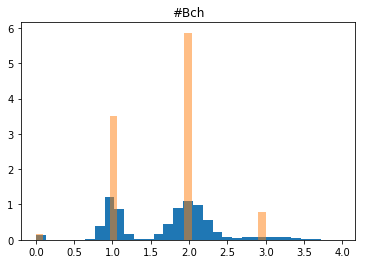

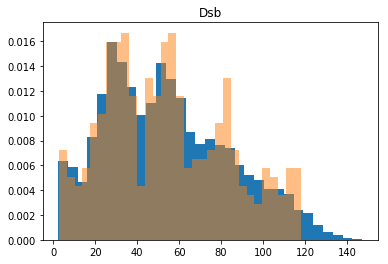

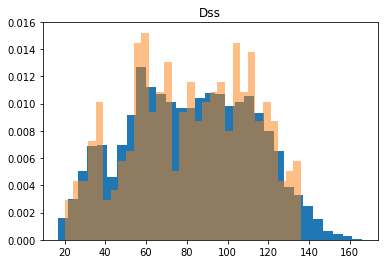

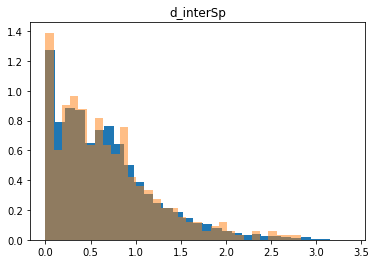

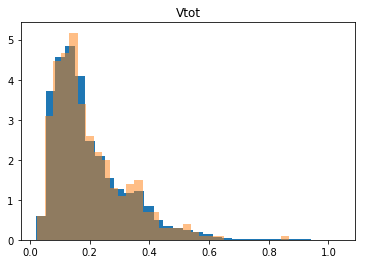

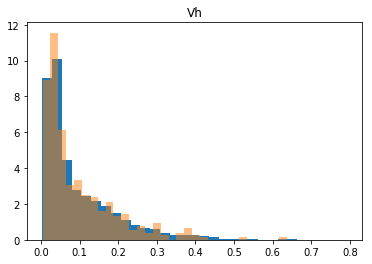

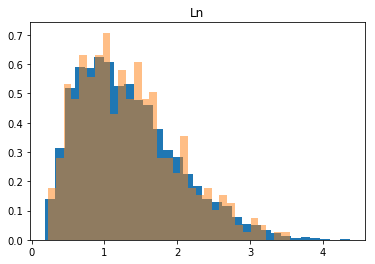

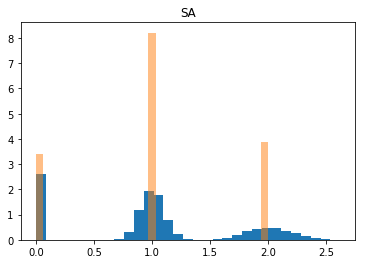

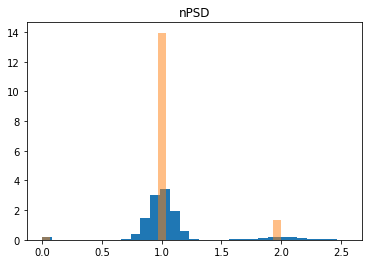

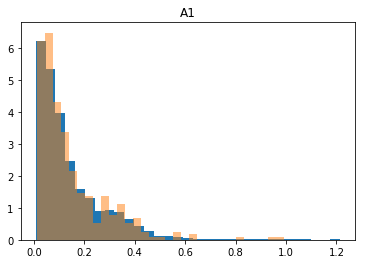

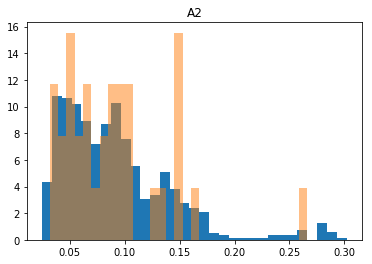

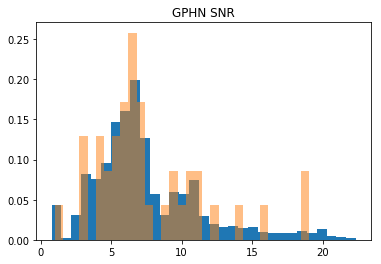

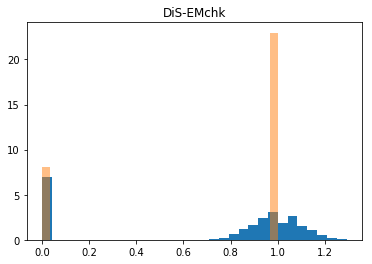

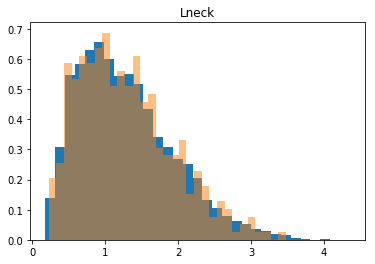

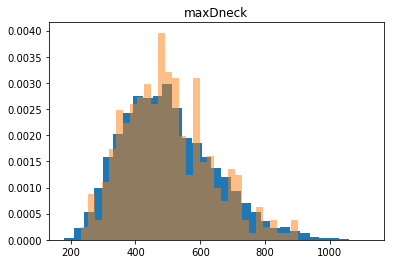

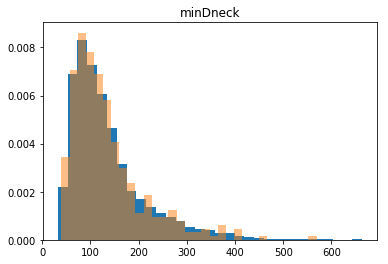

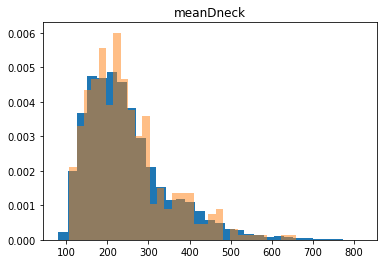

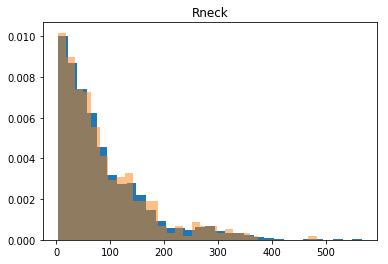

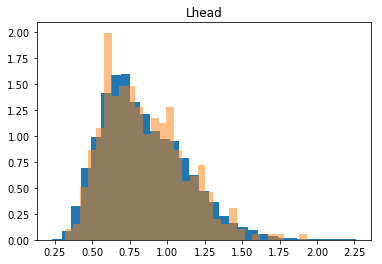

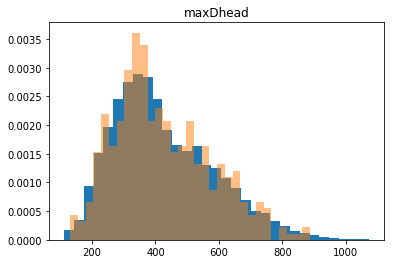

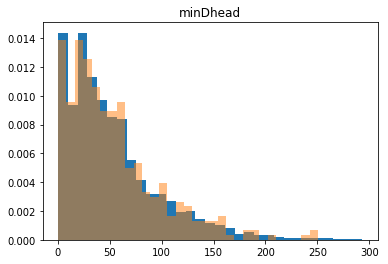

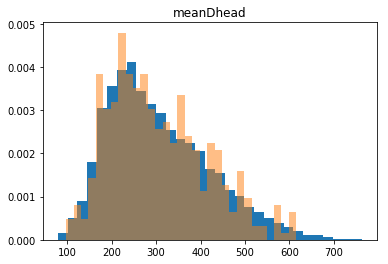

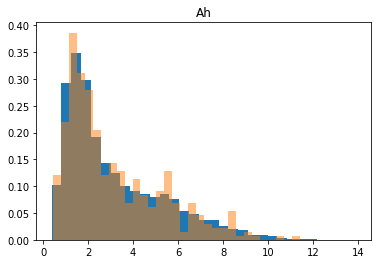

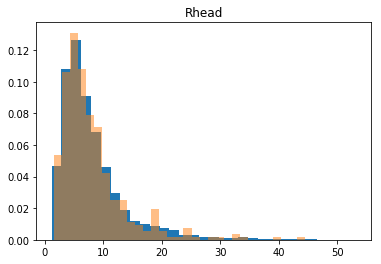

In [35]:
for key in data.keys():
    figure(key)
    hist(bt[key],31,density=True)
    hist(data[key],31,density=True,alpha=0.5)
    title(key)

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


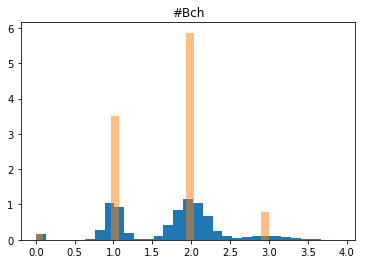

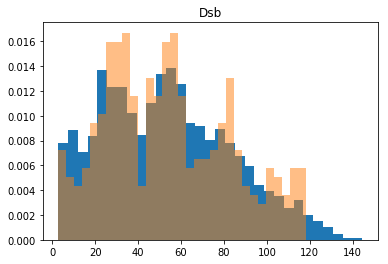

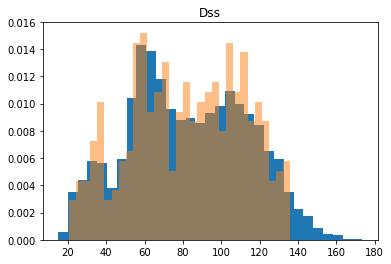

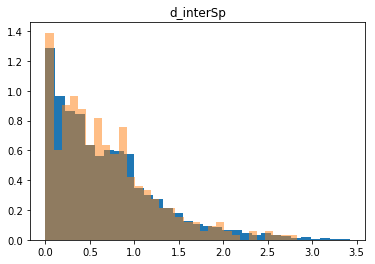

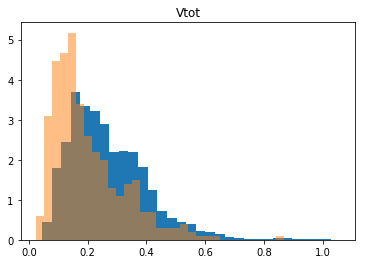

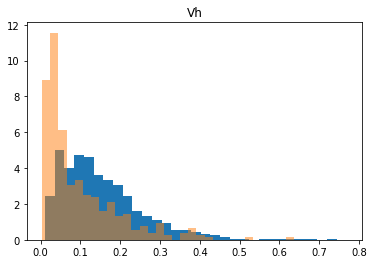

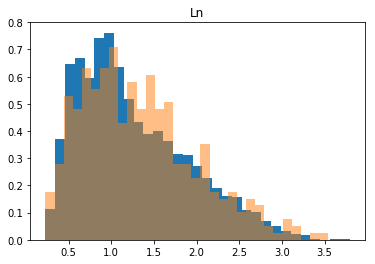

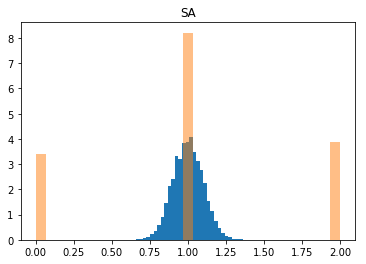

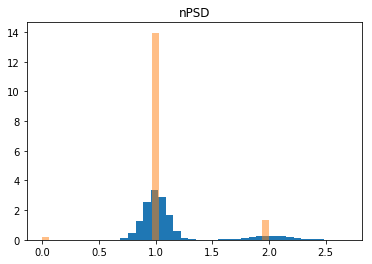

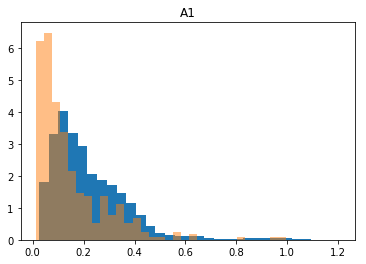

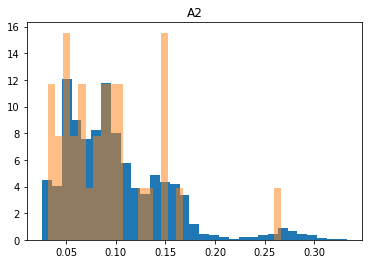

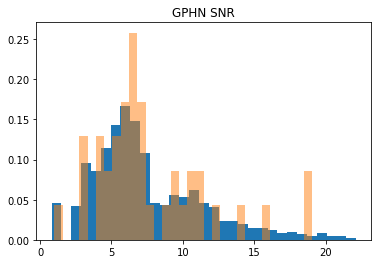

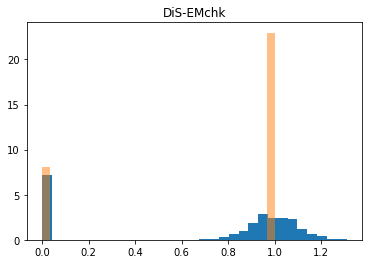

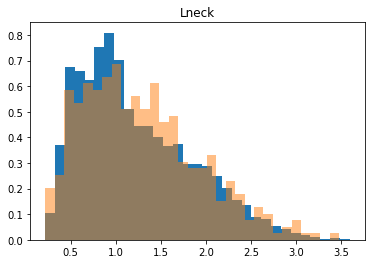

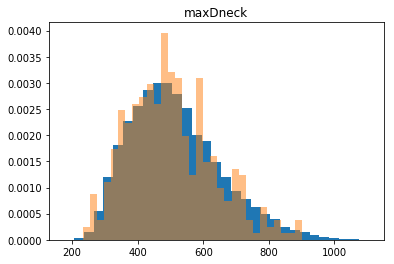

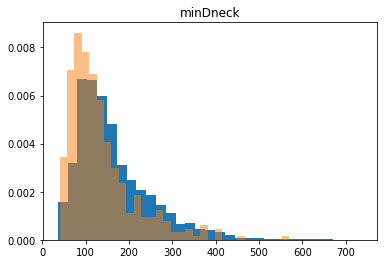

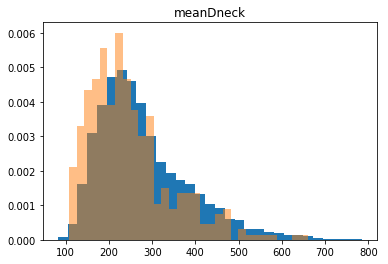

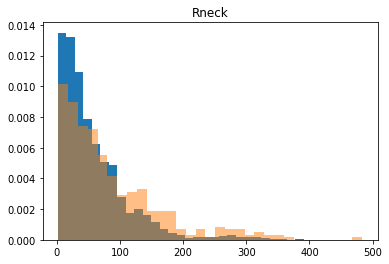

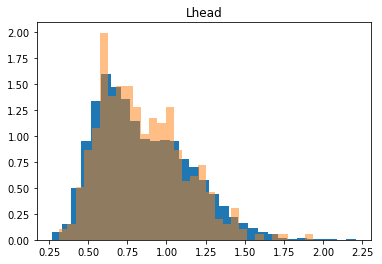

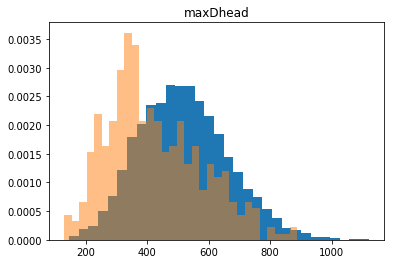

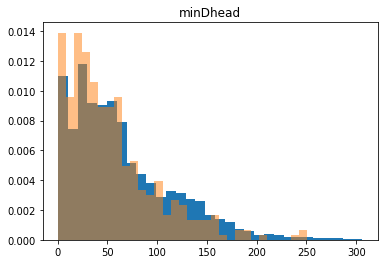

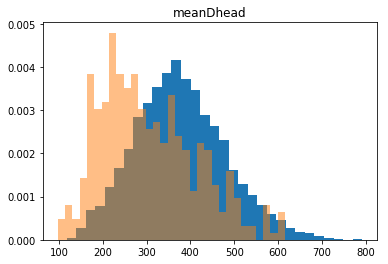

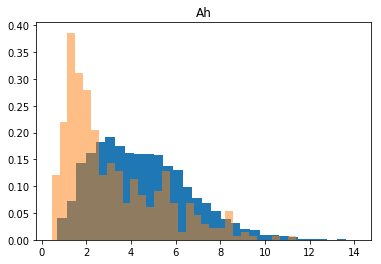

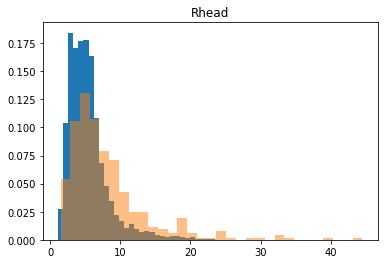

In [43]:
bt = btset_cd(data,cd='SA',size=10000)
for key in data.keys():
    figure(key)
    hist(bt[key],31,density=True)
    hist(data[key],31,density=True,alpha=0.5)
    title(key)

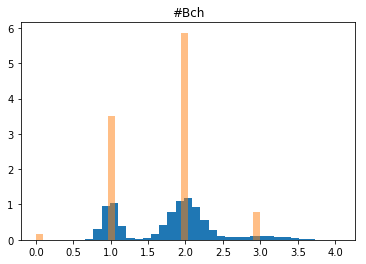

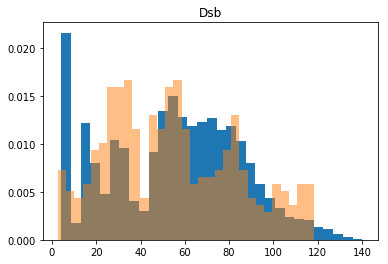

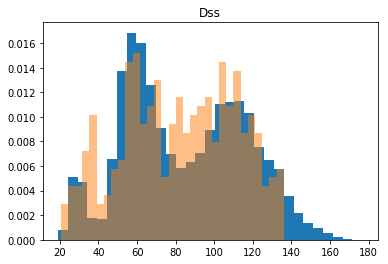

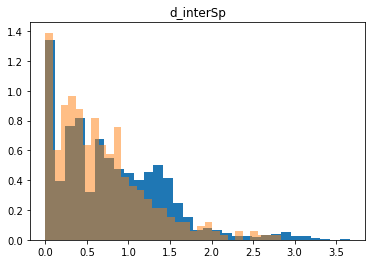

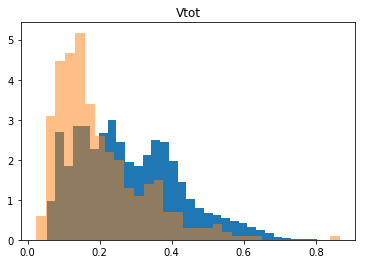

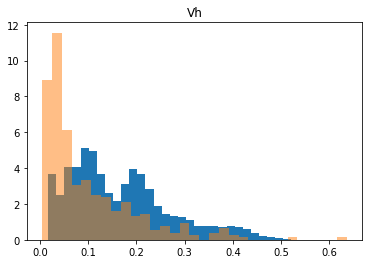

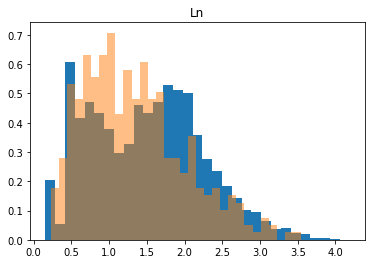

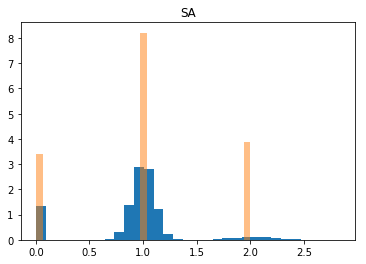

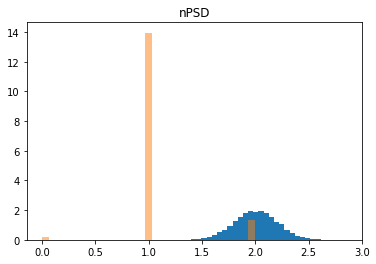

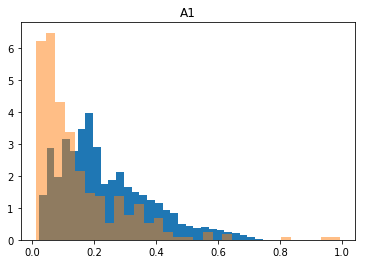

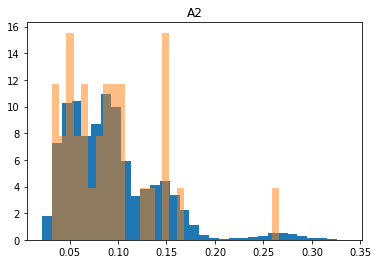

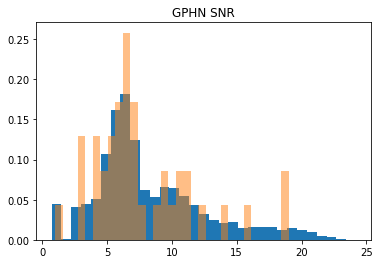

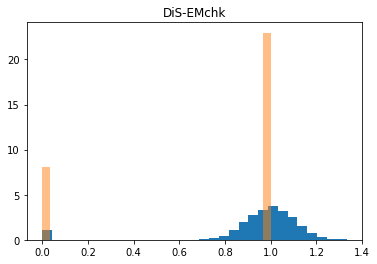

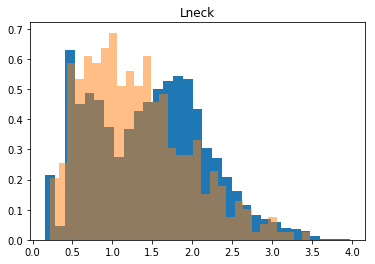

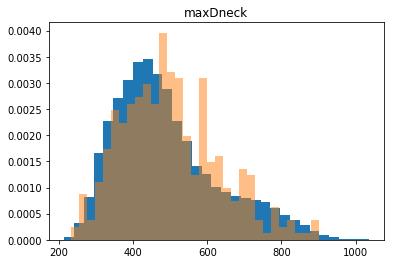

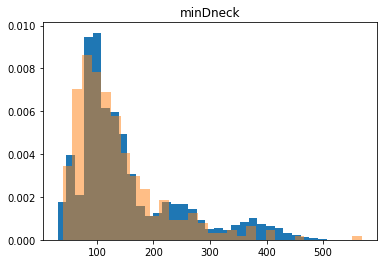

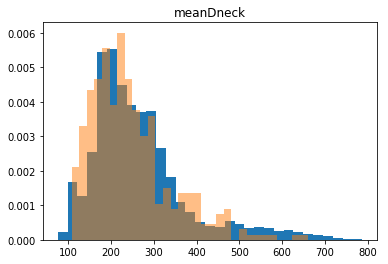

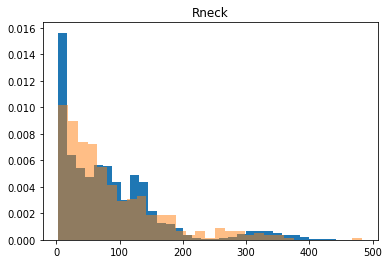

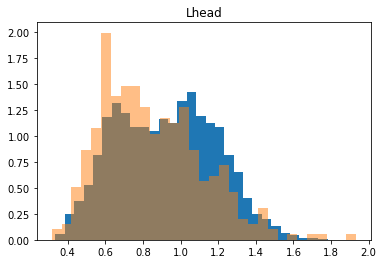

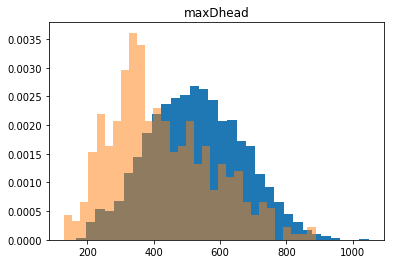

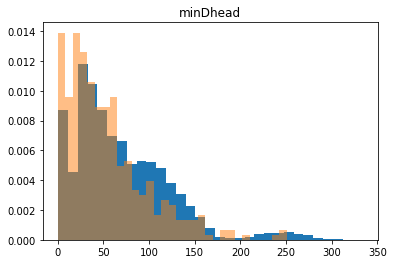

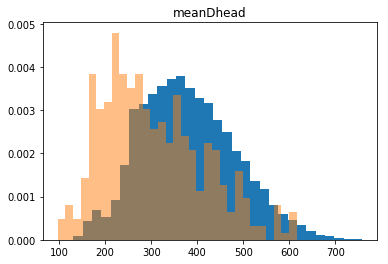

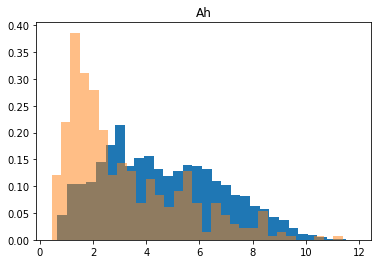

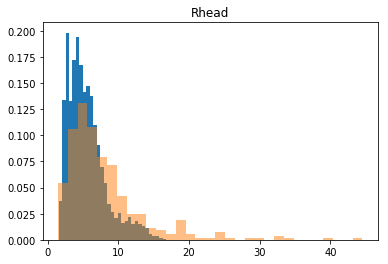

In [44]:
bt = btset_cd(data,cd='DiS',size=10000)
for key in data.keys():
    figure(key)
    hist(bt[key],31,density=True)
    hist(data[key],31,density=True,alpha=0.5)
    title(key)

Text(0.5, 0, 'Sphericity')

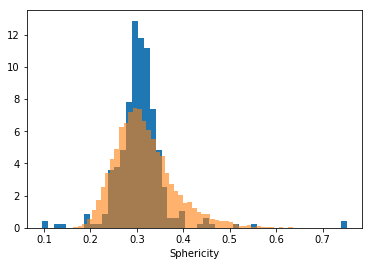

In [53]:
hist(pi**(1./3.0)*(6*data['Vh'])**(2./3.0)/data['Ah'],51,density=True)
hist(pi**(1./3.0)*(6*bt['Vh'])**(2./3.0)/bt['Ah'],51,density=True,alpha=0.6)
xlabel("Sphericity")

In [12]:
from scipy import stats

def btsrp(dat,n = None,f = lambda x : x):
    if n is None:
        n = len(dat)
    idx = randint(len(dat),size=n)
    return(f(dat[idx]))
def cumdist(dat,xbreaks = 31):
    h = histogram(dat,xb)
    hx = h[1]; hx = (hx[1:]+hx[:-1])/2.
    hy = h[0]; #hey = sqrt(hy)
    ty = sum(hy)
    hy = hy/ty#/(hx[1]-hx[0])
    cumhy = cumsum(hy)
    return(cumhy,hx)

0.9545354233305264


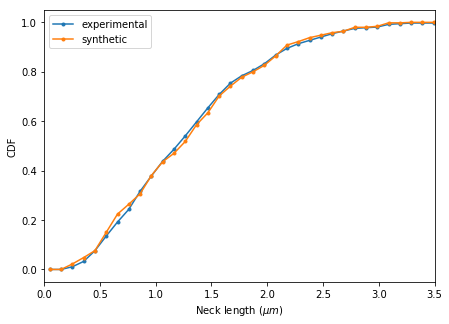

In [147]:
datB = btsrp(Ln,500)
#datB = btsrp(Ln,2000,f = lambda x: x*(1.0+randn(len(x))*0.02))
figure(figsize=(7*1.0,5*1.0))
cumB,hxB  = cumdist(datB)
plot(hx,Hcum,'.-',label='experimental')
plot(hxB,cumB,'.-',label='synthetic')
xlabel('Neck length ($\mu m$)')
xlim(0,3.5)
ylabel('CDF')
legend()
ks = stats.ks_2samp(Ln, datB)
print(ks.pvalue)
savefig('figures/cdfLnBootstrap.png',dpi = 300)

In [131]:
max(hx)

4.909183857142857

In [89]:
noiselvs = [0.01,0.02,0.05,0.10,0.2,0.3,0.4,0.5]
nb = 1000
xb2 = 100**linspace(-5,0,200)
xb2b = (xb2[1:]+xb2[:-1])/2.
for ins,ns in enumerate(noiselvs):
    pv = zeros(nb)
    for i in range(nb):
        datB = btsrp(Ln,500,f = lambda x: x*(1.0+randn(len(x))*ns))
        pv[i] = stats.ks_2samp(Ln, datB).pvalue
    h = histogram(pv,xb2)
    h = column_stack((xb2b,h[0],sqrt(h[0]),ns+0.*xb2b,mean(pv)+0.*xb2b))
    if ins == 0:
        hf = h
    else:
        hf = row_stack((hf,h))
    print(ns)

0.01
0.02
0.05
0.1
0.2
0.3
0.4
0.5


(1e-05, 1)

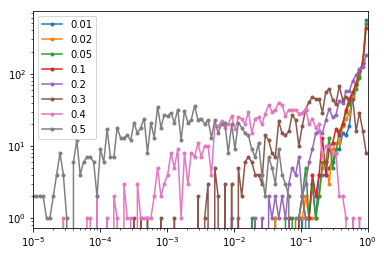

In [91]:
for ins,ns in enumerate(noiselvs):
    plot(hf[hf[:,-2]==ns,0],hf[hf[:,-2]==ns,1],'.-',label=ns)

legend()
xscale('log')
yscale('log')
xlim(1e-5,1)

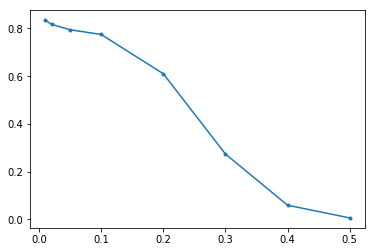

In [95]:
plot(hf[hf[:,0]==hf[0,0],-2],hf[hf[:,0]==hf[0,0],-1],'.-')
#xscale('log')

In [112]:
ns = 0.2

(hf[(hf[:,-2]==ns)*(hf[:,0]<1e-3),1].sum())/hf[(hf[:,-2]==ns),1].sum(

0.0

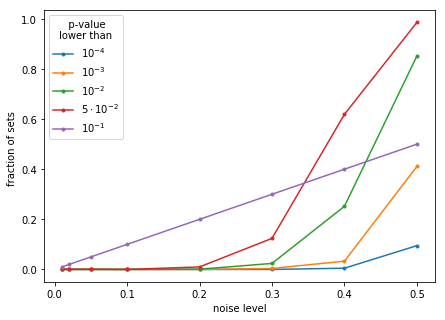

In [148]:
pcs = [1e-4,1e-3,1e-2,5e-2,1e-1]
pr = zeros((len(noiselvs),len(pcs)))
for ip,pcut in enumerate(pcs):
    for ins,ns in enumerate(noiselvs):
        pr[ins,ip] = (hf[(hf[:,-2]==ns)*(hf[:,0]<pcut),1].sum())/hf[(hf[:,-2]==ns),1].sum()
        pr[ins,-1] = ns
        
figure(figsize=(7*1.0,5*1.0))
plot(pr[:,-1],pr[:,0],'.-',label='$10^{-4}$')
plot(pr[:,-1],pr[:,1],'.-',label='$10^{-3}$')
plot(pr[:,-1],pr[:,2],'.-',label='$10^{-2}$')
plot(pr[:,-1],pr[:,3],'.-',label='$5\cdot 10^{-2}$')
plot(pr[:,-1],pr[:,4],'.-',label='$10^{-1}$')
        

legend(title='   p-value  \nlower than')
xlabel('noise level')
ylabel('fraction of sets ')
savefig('figures/fraction_noiselevel_Ln.png',dpi = 300)
#xscale('log')
#yscale('log')
#xlim(1e-5,1)

In [49]:
x4 = btsrp(Ln,4)
cumdist(x4)

(array([0.        , 0.        , 0.01081081, 0.03243243, 0.07567568,
        0.13513514, 0.19189189, 0.24324324, 0.31621622, 0.37837838,
        0.43783784, 0.48648649, 0.54054054, 0.5972973 , 0.65405405,
        0.70810811, 0.75405405, 0.78378378, 0.80540541, 0.83243243,
        0.86756757, 0.89459459, 0.91351351, 0.92702703, 0.94054054,
        0.95405405, 0.96486486, 0.97567568, 0.97837838, 0.98108108,
        0.99189189, 0.99459459, 0.9972973 , 0.9972973 , 0.9972973 ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 array([0.05061014, 0.15183043, 0.25305071, 0.354271  , 0.45549129,
        0.55671157, 0.65793186, 0.75915214, 0.86037243, 0.96159271,
        1.062813  , 1.16403329, 1.26525357, 1.36647386, 1.46769414,
        1.56891443, 1.67013471, 1.771355  , 1.87257529, 1.97379557,
        2.07501586, 2.17623614, 2.27745643, 2.37867671, 2.

In [128]:
Ln.shape

(370,)

In [9]:
with open("data_Fullset/shPSD_Morphometry.pkl","rb") as f:
    datash = pickle.load(f)

In [28]:
datash[]

,A,Dpb,Dps
shPSD_ID,,,
180618Lmoz3_1,0.264371,21.148512,53.880635
180618Lmoz3_2,0.091982,25.985787,58.717910
180618Lmoz3_3,0.199327,29.640078,62.372200
180618Mmoz3_1-1_shPSD1,0.108019,2.700000,54.077000
180618Mmoz3_1-1_shPSD2,0.264497,3.696448,55.073448
180618Mmoz3_1-1_shPSD3,0.140767,6.122697,57.499697
180618Mmoz3_1-2_shPSDA,0.114171,10.618761,61.995761
180618Mmoz3_2-1_shPSDC,0.134315,16.223004,67.600004
180618Mmoz3_2-2_shPSDB,0.160663,18.275345,69.652345


In [22]:
datash.shape

(62, 3)

(array([3., 1., 3., 5., 3., 1., 4., 3., 3., 5., 1., 2., 5., 0., 5., 0., 2.,
        0., 1., 0., 2., 0., 1., 3., 3., 2., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([0.0561116 , 0.06458597, 0.07306033, 0.0815347 , 0.09000907,
        0.09848344, 0.1069578 , 0.11543217, 0.12390654, 0.1323809 ,
        0.14085527, 0.14932964, 0.15780401, 0.16627837, 0.17475274,
        0.18322711, 0.19170148, 0.20017584, 0.20865021, 0.21712458,
        0.22559894, 0.23407331, 0.24254768, 0.25102205, 0.25949641,
        0.26797078, 0.27644515, 0.28491951, 0.29339388, 0.30186825,
        0.31034262, 0.31881698, 0.32729135, 0.33576572, 0.34424009,
        0.35271445, 0.36118882, 0.36966319, 0.37813755, 0.38661192,
        0.39508629, 0.40356066, 0.41203502, 0.42050939, 0.42898376,
        0.43745812, 0.44593249, 0.45440686, 0.46288123, 0.47135559,
        0.47982996, 0.48830433, 0.4967787 

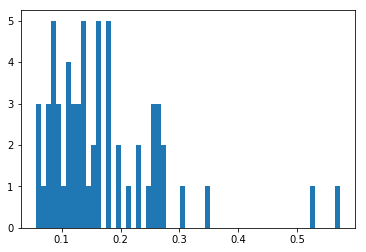

In [10]:
hist(datash['A'],61)

In [18]:
Ash = datash['A']
datB = btsrp(Ash,10000,f = lambda x: x*(1.0+randn(len(x))*.1))
pv = stats.ks_2samp(Ash, datB).pvalue

0.9983876036872895


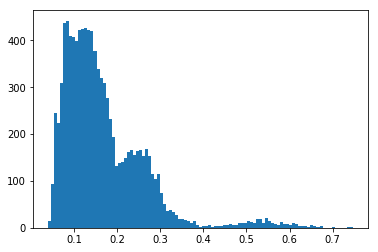

In [21]:
hist(datB,101)
print(pv)

In [25]:
log(Ash).mean()

-1.9091824890701394